In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from numpy.random import seed
from numpy.random import rand

# Generating synthetic time series  data

This notebook presents a series of functions for generating synthetic time series data. We attempt to simulate time series as realistic as possible with different shapes, frequency, period and with characterisitcs as non-stationarity, seasonality, trend and different kinds of anomalies

In [88]:
# function for plotting the time series and the anomalies
def plot_time_series(time, time2, values, values2, label):

    plt.figure(figsize=(10,6))
    plt.plot(time, values)
  #  plt.plot(time_amomaly, values_anomaly, 'x')
    plt.plot(time2, values2, 'x')
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

In [187]:
def gen_trend(timestamps, slope, label):
    time = np.arange(timestamps)
    values = time*(slope)
    plot_time_series(time, values, label)

# Function for generating contextual anomalies

The next function generaties contextual anomalies in a time series. Contextual anomalies are datapoints that are anomalous in a specific context but not outside of this context.

In [ ]:
# function for generating contextual anomalies
def gen_context(seasonal, lim1, lim2, anomaly):
    
    seed(1)
#specific range
    min1 = np.min(seasonal)
    max1 = np.max(seasonal)
    index = np.random.randint(lim1,lim2, size=1)
#generate a random floating point number
    f = min1 + (max1-min1)*rand(lim2-lim1)
    for i in range(0, (lim2-lim1)):
       # print(i)
       # print(f[i])
        seasonal[index + i] = f[i]
        anomaly[index + i] = 1
    X = np.asarray(seasonal)
    anomaly = np.asarray(anomaly)
   # print(X)
    #X = np.vstack(seasonal, anomaly)
    return X, anomaly

# Function for generating outliers in the time series

The next function generaties outliers as anomalies in a time series. We consider as outlier every data point that is larger that 3 times the standard deviation plus the mean of the data distribution. In the function we define the number of outliers in the time series and the lower and upper threshold of the interval in which the values of the oulier will be generated randomly.

In [ ]:
# function for generating outlier
def gen_outlier(data, number_outl, thres1, thres2, seasonal2, anomaly):
    std = data.std()
    mean2 = data.mean()
    out = (thres1*std) + mean2
    out2 = (thres2*std) + mean2
    #print(len(data))
    indices =  np.random.randint(0, high=len(data), size=number_outl)
    #print(indices)
    for j in indices:
        
        sep-om, 87k,uu\'m,mk;jgyu hop;   asonal2[j] = np.random.randint(out, high=out2, size=1)
        anomaly[j] = 1
    X = np.asarray(seasonal2)
    anomaly= np.asarray(anomaly)
    #X = np.vstack((X, anomaly))
    #print(X)
    #print(anomaly)
    return X, anomaly

# Function for generating plateaus in the time series

The next function generaties outliers as anomalies in a time series. The plateau is defined as the maximum interval such that all the values on the time positions in the interval are no less than all the values at the time positions outside of the interval. Also in this function we determine the length of the plateau as a time window in the time series and the number of plateaus that will appear in the time series

In [ ]:
# function for creating plateaus
def zero_slope(data, chunksize, number_plat, anomaly):
    """return the 'first' data point with zero slope

    data --> numpy ndarray - 2d [[x0,y0],[x1,y1],...]
    chunksize --> odd int
    returns numpy ndarray
    """
    
    for j in range(number_plat):
        index = np.random.randint(0, len(data) - chunksize, size=1)
    #print(len(data))
      #  print(index)
    
        for i in range(1, chunksize):
       # print(i)
            data[index + i] = data[index]
            anomaly[index + i] = 1
            #print(anomaly[index + i])
       # print(data[index + i])
        # subtract the endpoints of the chunk
        # if not sufficient, maybe use a linear fit
        #print(abs(chunk[0] - chunk[-1]))
       # dx = dy = abs(chunk[0] - chunk[-1])
        #print(np.vstack((data, anomaly)).T)
    
       # if 0 <= dy / dx < max_slope:
    X = np.asarray(data)
    anomaly= np.asarray(anomaly)
    return X, anomaly

# Variables used as args

timestamps = timestamps for the seasonality pattern 

thres = timestamps that are the thresholds for the appearance of the first triangle

exp1 =  exponent of the time for the generation of the first triangle

subtr1 = subtrahend to subtract from the time

exp2 = the exponent for the previous operation to create the second traingle

timesteps_all = the overall timesteps of the time series. It should have a perfect division with timestamps variable.

number_outl = number of outliers that we want to generate

thres1 = the lowest threshold for the generation of outlier. Specifically the the lowest number that will multiply the standard deviation. Based on the theory must be > |3|

thres2 = the highest threshold for the multiplier of the standard deviation. It must be >= thres1.

y = a multiplier for creating the trend

z = a multiplier for generating the noise

chunksize = the length of the plateau in timestamps

number_plat = number of plateaus

lim1= the starting timestamp for the contextual anomalies

lim2=the ending timestamp for the contextual anomalies


gen_out = boolean variable for generating outliers

plateau = boolean variable for generating plateaus

context = boolean variable for generating contextual anomalies

In [5]:
# Just a random pattern

def gen_seasonality(timestamps, thres, mult1, subtr1, multi2, timesteps_all, number_outl, gen_out, plateau):
    time = np.arange(timestamps)
    values = np.where(time < thres, time**mult1, (time-subtr1)**multi2)
    
    #std = values.std()
    #mean2 = values.mean()
    #out = (3*std) + mean2
    #out2 = (100*std) + mean2
    
# Put 2 at the random position 
# Repeat the pattern  times
    seasonal2 = []
    for i in range(timestamps//thres):
        for j in range(timestamps):
            seasonal2.append(values[j])
# Plot
    time_seasonal = np.arange(timesteps_all)
    #indices =  np.random.randint(0, high=len(values), size=2)
    #i = indices[0]
    #j = indices[1]
    #seasonal2[i] = np.random.randint(out, high=out2, size=1)
    #seasonal2[j] = np.random.randint(out, high=out2, size=1)
    #X = np.asarray(seasonal2)
    X = np.asarray(seasonal2)
    if gen_out:   
        X = gen_outlier(X, number_outl, seasonal2)
    if plateau:  
        X = zero_slope(X, chunksize =5)
        #print(X)    
    plot_time_series(time_seasonal, X, label="Seasonality")

# Function for generating time series with seasonality 

The next function creates a time series with seasonality and the form of triangles. Specifically, we have defined a pattern whe one triangle will be generated before a specific timestamp that is give as arg thres ans is equal to the timestamp to the power of specific number (multi1). Then, we have a second triangle that is generated after the thres timestamp and is equal to the timestamp minus a number give as an arg (subtr1) to the power of a number given as an arg with the name multi2. Since multi1, multi2 and subtr1 are given as an args of the function, the user can determine their windth as well as if both triangle will be used or only one. After determining the form of the time series and the seasonality, the use can determine if the time series will have anomalies, the kind of anomalies as well as the number of them. The output of the function is a dataframe with the timestamps and the values of the timeseries and a a column that takes 1 or 0 if the value is an anomaly or not. Also we plot the timeseries where the anomalies are highlighted with different color and the mark "x."

In [89]:
# Just a random pattern

def gen_seas_triangles(timestamps, thres, mult1, subtr1, multi2, timesteps_all, number_outl, thres1, thres2, chunksize, number_plat, lim1, lim2, gen_out, plateau, context):
    time = np.arange(timestamps)
    values = np.where(time < thres, time**mult1, (time-subtr1)**multi2)
    
    #std = values.std()
    #mean2 = values.mean()
    #out = (3*std) + mean2
    #out2 = (100*std) + mean2
    
# Put 2 at the random position 
# Repeat the pattern  times
    seasonal2 = []
    for i in range(timestamps//thres):
        for j in range(timestamps):
            seasonal2.append(values[j])
# Plot
    time_seasonal = np.arange(timesteps_all)
    #indices =  np.random.randint(0, high=len(values), size=2)
    #i = indices[0]
    #j = indices[1]
    #seasonal2[i] = np.random.randint(out, high=out2, size=1)
    #seasonal2[j] = np.random.randint(out, high=out2, size=1)
    #X = np.asarray(seasonal2)
    X = np.asarray(seasonal2)
   # anomaly = np.zeros(time_seasonal)
    anomaly = pd.Series([0 for x in range(len(time_seasonal))])
    #print(anomaly)
    anomaly =anomaly.values
    
    if gen_out:   
        X, anomaly = gen_outlier(X, number_outl, thres1, thres2, seasonal2, anomaly)
    if plateau:  
        X, anomaly = zero_slope(X, number_plat, chunksize, anomaly)
        #print(X)
    if context:
        X, anomaly = gen_context(X, lim1, lim2, anomaly)    
    
    
    results = np.vstack((X, anomaly))  
    mask1 = results[1, :] == 1
    #print(mask1)
    #print(results["Values"][["IsAnomaly"]==1])
    plot_time_series(time_seasonal, time_seasonal[mask1], results[0,:],results[0,mask1], label="Seasonality + Trend + Noise")
   # plot_time_series(time_seasonal[mask1], results[0,mask1], 'x')
    plt.plot(time_seasonal[mask1], results[0,mask1], 'x')
    print((pd.DataFrame({'Values': results[0,:], "IsAnomaly": results[1, :]})))

      Values IsAnomaly
0          0         0
1          1         0
2          8         0
3         27         0
4         64         0
5        125         0
6        216         0
7        343         0
8        512         0
9        729         0
10         1         0
11         4         0
12         9         0
13        16         0
14        25         0
15        36         0
16        49         0
17        64         0
18        81         0
19       100         0
20       121         0
21       144         0
22       169         0
23       196         0
24       225         0
25   1590.35         1
26   1368.87         1
27  -1387.92         1
28   1596.71         1
29  -1017.92         1
..       ...       ...
220      121         0
221      144         0
222      169         0
223      196         0
224      225         0
225      256         0
226      289         0
227      324         0
228      361         0
229      400         0
230      441         0
231      48

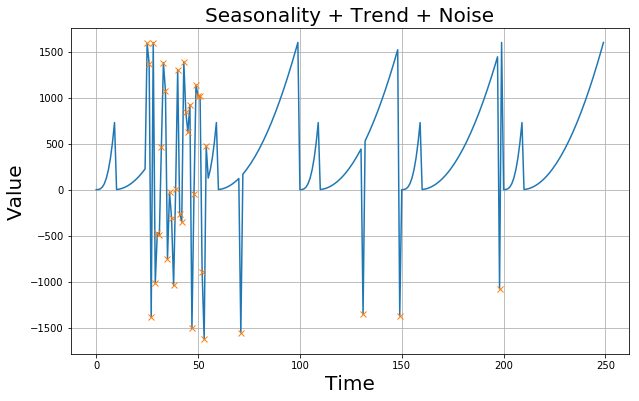

In [90]:
gen_seas_triangles(50, 10, 3, 9, 2, 250, 5,- 5, -3, 2, 100, 20, 50, True, False, True)

# Function for generating time series with seasonality and the form of sine and/or cosine

The next function creates a time series with seasonality in the form of sine and/or cosine. In particular, the user is able to create the desired form of the time series usinf the arms mult_sin and mult_cos. After determining the form of the time series and the seasonality, the use can determine if the time series will have anomalies, the kind of anomalies as well as the number of them. Also when we create contextual anomalies we have the args lim1 and lim2 for marking the starting and ending timestamps of the contextual anomaly. The output of the function is a dataframe with the timestamps and the values of the timeseries and a a column that takes 1 or 0 if the value is an anomaly or not. Also we plot the timeseries where the anomalies are highlighted with different color and the mark "x."

In [91]:
def gen_seas_cos_sin(timestamps, timesteps_all, mult_sin, mult_cos, number_outl, thres1, thres2, chunksize, number_plat, lim1, lim2, gen_out, plateau, context):
     
    time = np.arange(0,timestamps)
    values=  np.sin(mult_sin*np.pi*time/timestamps)+np.cos(mult_cos*np.pi*time/timestamps)
    
    #std = values.std()
    #mean2 = values.mean()
    #out = (3*std) + mean2
    #out2 = (100*std) + mean2
    
# Put 2 at the random position 
# Repeat the pattern  times
    seasonal2 = []
    for i in range(timesteps_all//timestamps):
        for j in range(timestamps):
            seasonal2.append(values[j])
# Plot
    time_seasonal = np.arange(timesteps_all)
    #indices =  np.random.randint(0, high=len(values), size=2)
    #i = indices[0]
    #j = indices[1]
    #seasonal2[i] = np.random.randint(out, high=out2, size=1)
    #seasonal2[j] = np.random.randint(out, high=out2, size=1)
    #X = np.asarray(seasonal2)
    X = np.asarray(seasonal2)
   
    anomaly = pd.Series([0 for x in range(len(time_seasonal))])
    #print(anomaly)
    anomaly =anomaly.values
    if gen_out:   
        X, anomaly = gen_outlier(X, number_outl, thres1, thres2, seasonal2, anomaly)
    if plateau:  
        X, anomaly = zero_slope(X, chunksize, number_plat, anomaly)
        #print(X)    
    if context:
        X, anomaly = gen_context(X, lim1, lim2, anomaly)
    results = np.vstack((X, anomaly))   
   # print(results[1,:])
    mask1 = results[1, :] == 1
    plot_time_series(time_seasonal, time_seasonal[mask1], results[0,:],results[0,mask1], label="Seasonality + Trend + Noise")
    print((pd.DataFrame({'Values': results[0, :], "IsAnomaly": results[1, :]})))

        Values IsAnomaly
0            1         0
1     0.992115         0
2     0.968583         0
3     0.929776         0
4     0.876307         0
5     0.809017         0
6     0.728969         0
7     0.637424         0
8     0.535827         0
9     0.425779         0
10    0.309017         0
11    0.187381         0
12   0.0627905         0
13  -0.0627905         0
14   -0.187381         0
15   -0.309017         0
16   -0.425779         0
17   -0.535827         0
18   -0.637424         0
19   -0.728969         0
20   -0.809017         0
21   -0.876307         0
22   -0.929776         0
23   -0.968583         0
24   -0.992115         0
25    0.988739         1
26    0.730229         1
27     -2.4875         1
28    0.996162         1
29    -2.05564         1
..         ...       ...
220  -0.809017         0
221  -0.876307         0
222  -0.929776         0
223  -0.968583         0
224  -0.992115         0
225         -1         0
226  -0.992115         0
227  -0.968583         0


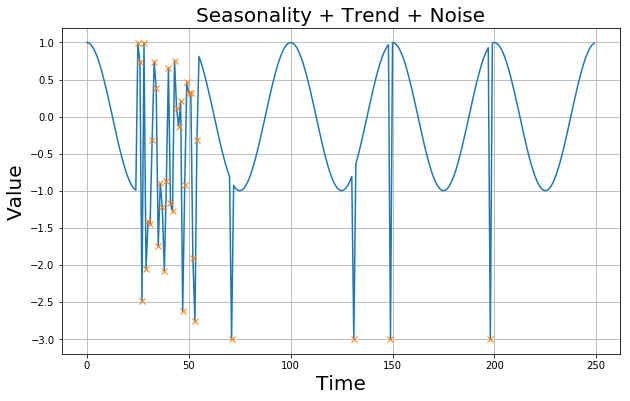

In [92]:
gen_seas_cos_sin(50, 250, 0, 2, 5,- 5, -3, 2, 100, 20, 50, True, False, True)

# Function for generating non-stationary time series 

The next function creates a time series with non-stationary and the form of triangles. The pattern that is created is the same as with gen_seas_triangles. After determining the form of the time series and the seasonality, the trend can be determined with the arg y as well as the noise factor with the arg z. Then,  it can be chosen if the time series will have anomalies, the kind of anomalies as well as the number of them. The output of the function is a dataframe with the timestamps and the values of the timeseries and a a column that takes 1 or 0 if the value is an anomaly or not. Also we plot the timeseries where the anomalies are highlighted with different color and the mark "x."

In [94]:
# function for creating non-stationary time series with the form of triangles
def gen_seas_trend_noise_triangles(timestamps, thres, exp1, subtr1, exp2, timesteps_all, number_outl, thres1, thres2, y, z,chunksize, number_plat, lim1, lim2, gen_out, plateau, context):
    time = np.arange(timestamps)
    values = np.where(time < thres, time**exp1, (time-subtr1)**exp2)
# Repeat the pattern  times
    seasonal2 = []
    for i in range(timesteps_all//timestamps):
        for j in range(timestamps):
            seasonal2.append(values[j])
    seasonal_upward = seasonal2 + np.arange(timesteps_all)*y + np.random.randn(timesteps_all)*z
    time_seasonal = np.arange(timesteps_all)
    
    anomaly = pd.Series([0 for x in range(len(time_seasonal))])
    #print(anomaly)
    anomaly =anomaly.values
  #  print(anomaly)
    X = np.asarray(seasonal_upward)
    
    if gen_out: 
       # print(X.shape)
        X, anomaly = gen_outlier(X, number_outl, thres1, thres2, seasonal_upward, anomaly)
    if plateau:  
        X, anomaly = zero_slope(X, chunksize, number_plat, anomaly)
    if context:
        X, anomaly =gen_context(X, lim1, lim2, anomaly)  
     #   X, anomaly = gen_context(X, lim1, lim2, anomaly)  
    results = np.vstack((X, anomaly))   
   # print(results[1,:])
    mask1 = results[1, :] == 1
    plot_time_series(time_seasonal, time_seasonal[mask1], results[0,:],results[0,mask1], label="Seasonality + Trend + Noise")
    print((pd.DataFrame({'Values': results[0, :], "IsAnomaly": results[1, :]})))

# Variables used as args

timestamps = timestamps for the seasonality pattern 

thres = timestamps that are the thresholds for the appearance of the first triangle

exp1 =  exponent of the time for the generation of the first triangle

subtr1 = subtrahend to subtract from the time

exp2 = the exponent for the previous operation to create the second traingle

timesteps_all = the overall timesteps of the time series. It should have a perfect division with timestamps variable.

number_outl = number of outliers that we want to generate

thres1 = the lowest threshold for the generation of outlier. Specifically the the lowest number that will multiply the standard deviation. Based on the theory must be > |3|

thres2 = the highest threshold for the multiplier of the standard deviation. It must be >= thres1.

y = a multiplier for creating the trend

z = a multiplier for generating the noise

chunksize = the length of the plateau in timestamps

number_plat = number of plateaus

lim1= the starting timestamp for the contextual anomalies

lim2=the ending timestamp for the contextual anomalies


gen_out = boolean variable for generating outliers

plateau = boolean variable for generating plateaus

context = boolean variable for generating contextual anomalies

# Function for generating non-stationary time series with the form of sine and cosine

This function has similar functionality with gen_seas_trend_noise_triangles with the difference that the pattern is sine and/or cosine like with the function gen_seas_cos_sin

# Additional variables for the gen_seas_trend_noise_cos_sin
mult_sin = multiplier for creating sine

mult_cos = multiplier for creating cosine

In [95]:
# function for creating non-stationary time series with the form of cosine or/and sine
def gen_seas_trend_noise_cos_sin(timestamps, timesteps_all, mult_sin, mult_cos,w, y, z, number_outl, thres1, thres2,chunksize, number_plat, lim1, lim2, gen_out, plateau, context):
    time = np.arange(0,timestamps)
    values=  (np.sin(mult_sin*np.pi*time/timestamps)+np.cos(mult_cos*np.pi*time/timestamps))*w
    
# Repeat the pattern  times
    seasonal2 = []
    for i in range(timesteps_all//timestamps):
        for j in range(timestamps):
            seasonal2.append(values[j])
    seasonal_upward = seasonal2 + np.arange(timesteps_all)*y + np.random.randn(timesteps_all)*z
    time_seasonal = np.arange(timesteps_all)
    
    anomaly = pd.Series([0 for x in range(len(time_seasonal))])
    #print(anomaly)
    anomaly =anomaly.values
  #  print(anomaly)
    X = np.asarray(seasonal_upward)
    
    if gen_out: 
       # print(X.shape)
        X, anomaly = gen_outlier(seasonal_upward, number_outl, thres1, thres2, seasonal_upward, anomaly)
    if plateau:  
        X, anomaly = zero_slope(seasonal_upward, chunksize, number_plat, anomaly)
    if context:
        X, anomaly =gen_context(seasonal_upward, lim1, lim2, anomaly)  
     #   X, anomaly = gen_context(X, lim1, lim2, anomaly)  
    results = np.vstack((X, anomaly))   
   # print(results[1,:])
    mask1 = results[1, :] == 1
    plot_time_series(time_seasonal, time_seasonal[mask1], results[0,:],results[0,mask1], label="Seasonality + Trend + Noise")
    print((pd.DataFrame({'Values': results[0, :], "IsAnomaly": results[1, :]})))

         Values  IsAnomaly
0     35.114711        0.0
1     34.920194        0.0
2     29.902908        0.0
3     33.873009        0.0
4     33.519016        0.0
5     34.729654        0.0
6     34.633445        0.0
7     39.540320        0.0
8     34.822526        0.0
9     32.239810        0.0
10    28.084408        0.0
11    33.289120        0.0
12    23.976950        0.0
13    25.624044        0.0
14    24.323485        0.0
15    20.135685        0.0
16    20.759588        0.0
17    15.597679        0.0
18    16.231060        0.0
19    17.138987        0.0
20    18.845966        0.0
21    19.138325        0.0
22    14.009924        0.0
23    12.563982        0.0
24     9.604965        0.0
25    10.214157        0.0
26    15.095276        0.0
27    14.348524        0.0
28    24.919824        0.0
29    15.670910        0.0
..          ...        ...
270  142.961577        0.0
271  138.133619        0.0
272  132.531841        0.0
273  138.422936        0.0
274  131.818390        0.0
2

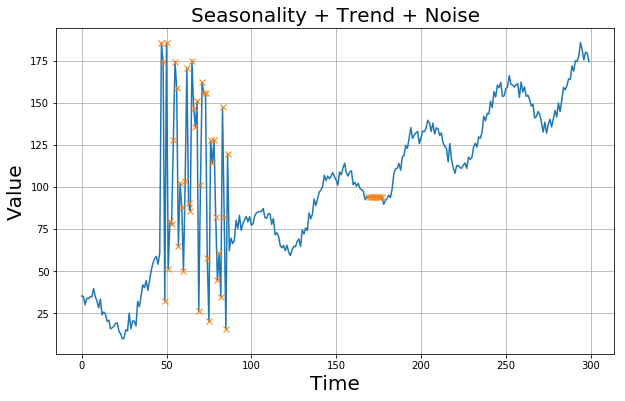

In [96]:
gen_seas_trend_noise_cos_sin(50, 300, 1, 2, 30,0.5,  3, 5, 3,10, 6,2, 10, 50, gen_out=False, plateau=True, context=True)

          Values  IsAnomaly
0      -7.639320        0.0
1      17.089921        0.0
2      19.113642        0.0
3      55.277401        0.0
4     103.659054        0.0
5     170.271369        0.0
6     276.406259        0.0
7     406.766564        0.0
8     590.417935        0.0
9     822.229503        0.0
10    110.169561        0.0
11    125.740061        0.0
12    131.869202        0.0
13    146.716071        0.0
14    159.855209        0.0
15    181.428313        0.0
16    212.835829        0.0
17    234.285156        0.0
18    279.689002        0.0
19    286.805230        0.0
20    323.073502        0.0
21    351.446916        0.0
22    375.567372        0.0
23    436.532382        0.0
24    463.414840        0.0
25   4079.386055        1.0
26   3655.957934        1.0
27  -1614.550309        1.0
28   4091.544316        1.0
29   -907.184994        1.0
..           ...        ...
220  2317.161513        0.0
221 -1525.000000        1.0
222 -1525.000000        1.0
223  2419.857400    

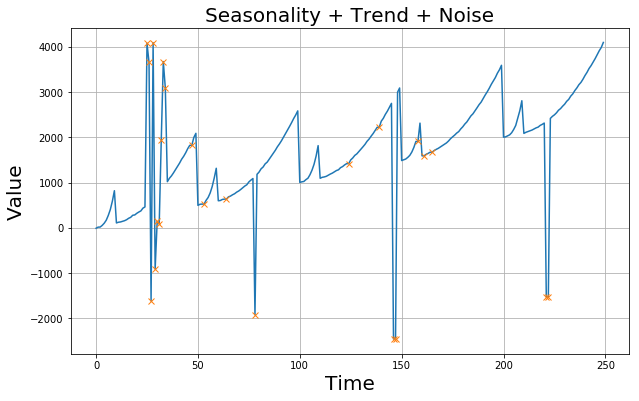

In [97]:
gen_seas_trend_noise_triangles(50, 10, 3, 9, 2, 250, 3, -5, -3,10, 6,2, 10, 20,30, gen_out=True, plateau=True, context=True)

In [ ]:
def gen_seas_trend_noise(timestamps, thres, mult1, subtr1, multi2, timesteps_all, number_outl, gen_out, plateau):
    time = np.arange(timestamps)
    values = np.where(time < thres, time**mult1, (time-subtr1)**multi2)
# Repeat the pattern  times
    seasonal2 = []
    for i in range(timestamps//thres):
        for j in range(timestamps):
            seasonal2.append(values[j])
    seasonal_upward = seasonal2 + np.arange(timesteps_all)*10
    time_seasonal = np.arange(timesteps_all)
    
    X = np.asarray(seasonal_upward)
    if gen_out:   
        X = gen_outlier(X, number_outl, seasonal_upward)
    if plateau:  
        X = zero_slope(X, chunksize =5)
    plot_time_series(time_seasonal, X, label="Seasonality + Upward Trend + Noise")

In [2]:
def gen_seas_trend_noise(timestamps_all, multi1):
    seasonal_upward = seasonal2 + np.arange(timestamps)*multi1
    time_seasonal = np.arange(timestamps)
    plot_time_series(time_seasonal, seasonal_upward, label="Seasonality + Upward Trend + Noise")

In [17]:
def gen_noise(timestamps, multi1):
    time = np.arange(timestamps)
    values = np.random.randn(timestamps)*multi1
    plot_time_series(time, values, label="White Noise")

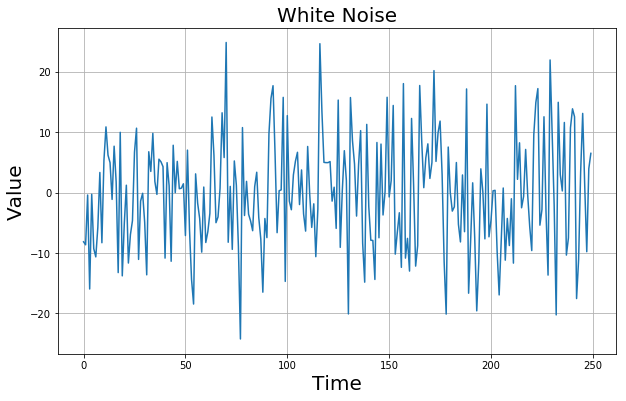

In [23]:
gen_noise(250, 10)

In [98]:
def gen_nonstationary_triangles(timestamps, thres, mult1, subtr1, multi2, timesteps_all, number_outl, thres1, thres2, y, x, chunksize, number_plat, lim1, lim2, gen_out, plateau, context):
# Repeat the pattern  times
    time = np.arange(timestamps)
    values = np.where(time < thres, time**mult1, (time-subtr1)**multi2)
    
# Repeat the pattern  times
    seasonal2 = []
    for i in range(timesteps_all//timestamps):
        for j in range(timestamps):
            seasonal2.append(values[j])
    seasonal_upward = seasonal2 + np.arange(timesteps_all)*y
    time_seasonal = np.arange(timesteps_all)
    
    big_event = np.zeros(timesteps_all)
    big_event[-x:] = np.arange(x)*-x
    non_stationary = seasonal_upward + big_event
    time_seasonal = np.arange(timesteps_all)
    
    anomaly = pd.Series([0 for x in range(len(time_seasonal))])
    #print(anomaly)
    anomaly =anomaly.values
    
    X = np.asarray(non_stationary)
    if gen_out:   
        X = gen_outlier(non_stationary, number_outl, thres1, thres2, non_stationary, anomaly)
    if plateau:  
        X = zero_slope(non_stationary, chunksize, number_plat, anomaly)
    if context:
        X, anomaly =gen_context(non_stationary, lim1, lim2, anomaly)      
    results = np.vstack((X, anomaly))   
   # print(results[1,:])
    mask1 = results[1, :] == 1
    plot_time_series(time_seasonal, time_seasonal[mask1], results[0,:],results[0,mask1], label="Non-stationary Time Series")
    print((pd.DataFrame({'Values': results[0, :], "IsAnomaly": results[1, :]})))
    

            Values  IsAnomaly
0         0.000000        0.0
1       101.000000        0.0
2       101.000000        1.0
3       101.000000        1.0
4       101.000000        1.0
5       101.000000        1.0
6       101.000000        1.0
7       101.000000        1.0
8       101.000000        1.0
9       101.000000        1.0
10      101.000000        1.0
11     2431.000000        0.0
12     2928.000000        0.0
13     3497.000000        0.0
14     4144.000000        0.0
15   165834.164578        1.0
16   146439.530980        1.0
17   -94969.981301        1.0
18   166391.059608        1.0
19   -62569.934106        1.0
20   -14406.520319        1.0
21   -17008.374488        1.0
22    67570.115899        1.0
23   147334.339610        1.0
24   120557.059787        1.0
25    18125.000000        0.0
26    20176.000000        0.0
27    22383.000000        0.0
28    24752.000000        0.0
29    27289.000000        0.0
..             ...        ...
470   55000.000000        0.0
471   5633

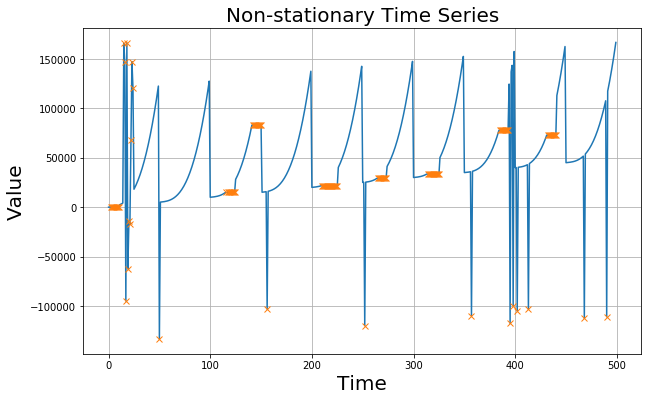

In [99]:
gen_nonstationary_triangles(50, 100, 3, 9, 2, 500, 10, -5, -4, 100, 30, 10, 10,10, 20, gen_out=True, plateau=True, context=True)

In [199]:
def gen_nonstationary_con_sin(timestamps, timesteps_all, mult_sin, mult_cos,w, y, x, number_outl, thres1, thres2,chunksize, number_plat, lim1, lim2, gen_out, plateau, context):
# Repeat the pattern  times
    time = np.arange(0,timestamps)
    values=  (np.sin(mult_sin*np.pi*time/timestamps)+np.cos(mult_cos*np.pi*time/timestamps))*w
# Repeat the pattern  times
    seasonal2 = []
    for i in range(timesteps_all//timestamps):
        for j in range(timestamps):
            seasonal2.append(values[j])
    seasonal_upward = seasonal2 + np.arange(timesteps_all)*y
    time_seasonal = np.arange(timesteps_all)
    
    big_event = np.zeros(timesteps_all)
    big_event[-x:] = np.arange(x)*-x
    non_stationary = seasonal_upward + big_event
    time_seasonal = np.arange(timesteps_all)
    
    anomaly = pd.Series([0 for x in range(len(time_seasonal))])
    #print(anomaly)
    anomaly =anomaly.values
    
    X = np.asarray(non_stationary)
    if gen_out:   
        X = gen_outlier(non_stationary, number_outl, thres1, thres2, non_stationary, anomaly)
    if plateau:  
        X = zero_slope(non_stationary, chunksize, number_plat, anomaly)
    if context:
        X, anomaly =gen_context(non_stationary, lim1, lim2, anomaly)      
    results = np.vstack((X, anomaly))   
   # print(results[1,:])
    
    plot_time_series(time_seasonal, results[0, :], label="Non-stationary Time Series")
    print((pd.DataFrame({'Values': results[0, :], "IsAnomaly": results[1, :]})))

         Values  IsAnomaly
0     30.772781        0.0
1     26.268973        0.0
2     29.294069        0.0
3     34.068858        0.0
4     38.324434        0.0
5     36.255049        0.0
6     29.035868        0.0
7     31.149441        0.0
8     37.184902        0.0
9     35.243888        0.0
10    32.024848        0.0
11    27.534790        0.0
12    28.946097        0.0
13    27.068636        0.0
14    22.888211        0.0
15    24.832054        0.0
16    21.070474        0.0
17    17.385842        0.0
18    22.136803        0.0
19    22.136803        1.0
20    22.136803        1.0
21    22.136803        1.0
22    22.136803        1.0
23    22.136803        1.0
24    10.898011        0.0
25    16.644222        0.0
26    13.472472        0.0
27    13.097574        0.0
28    11.755663        0.0
29    20.313255        0.0
..          ...        ...
270  146.471063        0.0
271  139.060290        0.0
272  137.364713        0.0
273  135.430669        0.0
274  136.915813        0.0
2

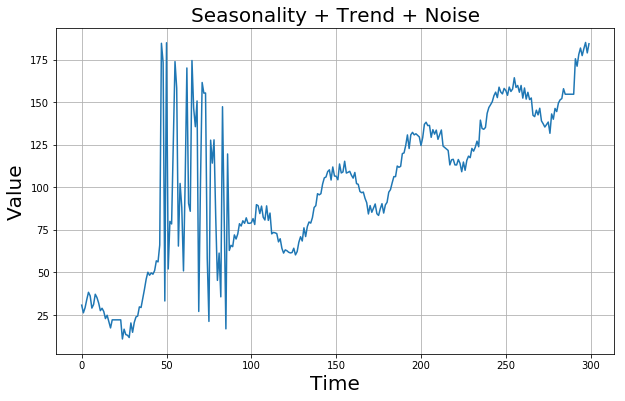

In [201]:
gen_seas_trend_noise_cos_sin(50, 300, 1, 2, 30,0.5,  3, 5, 3,10, 6,2, 10, 50, gen_out=False, plateau=True, context=True)